In [9]:
import pandas as pd

docs = [ # topics: health and sugar
"sugar is bad to health.",
"health experts say that sugar is not good for your lifestyle.",
"my health is important, so I don't use sugar.",
"a good lifestyle means less blood pressure and a long life.",
"my life is important to me. so I practice sports.",
"My sister likes to have sugar, but not my father",

# driving
"my father is driving my sister around to dance practice by car.",
"my father does not need driving me there.",
"I love driving my car.",
"I am driving to relax. I really love my car",
"driving my sister home is realy nice",

# school
"my school is great, I love to study there",
"sometimes I feel happy to perform well at school.",
"I am doing well at school, but my sister could study a little more.",
"I study everyday, and I love the school.",
"my school is the best."
]

df = pd.DataFrame(docs,columns=['docs'])

In [10]:
df

,docs
0,sugar is bad to health.
1,health experts say that sugar is not good for ...
2,"my health is important, so I don't use sugar."
3,a good lifestyle means less blood pressure and...
4,my life is important to me. so I practice sports.
5,"My sister likes to have sugar, but not my father"
6,my father is driving my sister around to dance...
7,my father does not need driving me there.
8,I love driving my car.
9,I am driving to relax. I really love my car


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [18]:
def clean_text(doc):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(doc)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

df['clean'] = df['docs'].apply(clean_text)
df

,docs,clean
0,sugar is bad to health.,sugar health
1,health experts say that sugar is not good for ...,health expert sugar good lifestyle
2,"my health is important, so I don't use sugar.",health important sugar
3,a good lifestyle means less blood pressure and...,good lifestyle mean less blood pressure long life
4,my life is important to me. so I practice sports.,life important practice sport
5,"My sister likes to have sugar, but not my father",sister like sugar father
6,my father is driving my sister around to dance...,father driving sister around dance practice
7,my father does not need driving me there.,father need driving
8,I love driving my car.,love driving
9,I am driving to relax. I really love my car,driving relax really love


In [20]:
vect = TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform(df['clean'])
print(vect_text.shape)
print(vect_text)

(16, 39)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 68 stored elements and shape (16, 39)>
  Coords	Values
  (0, 37)	0.6725574744191696
  (0, 13)	0.7400448929645471
  (1, 37)	0.371929696300863
  (1, 13)	0.40925078191572245
  (1, 7)	0.5251806625554273
  (1, 10)	0.45736602966812034
  (1, 18)	0.45736602966812034
  (2, 37)	0.5182705984874767
  (2, 13)	0.5702761833337295
  (2, 15)	0.637323043256516
  (3, 10)	0.32287233030528584
  (3, 18)	0.32287233030528584
  (3, 23)	0.37074529665788164
  (3, 16)	0.37074529665788164
  (3, 2)	0.37074529665788164
  (3, 28)	0.37074529665788164
  (3, 21)	0.37074529665788164
  (3, 17)	0.32287233030528584
  (4, 15)	0.4812071661851887
  (4, 17)	0.4812071661851887
  (4, 27)	0.4812071661851887
  (4, 35)	0.552556775034078
  (5, 37)	0.4383342090345474
  (5, 33)	0.4383342090345474
  (5, 19)	0.6189466789316405
  :	:
  (10, 14)	0.5048053600368153
  (10, 30)	0.5048053600368153
  (10, 25)	0.5048053600368153
  (11, 22)	0.4451100775288952
  (11, 32)	0.4086

Latent Semantic Analysis (LSA)

In [25]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [26]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
love driving sugar school health study father sister everyday great 

Topic 1: 
sugar health important good lifestyle expert like life sport father 

Topic 2: 
driving father need sister around dance practice home nice realy 



Latent Dirichlet Allocation (LDA)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=42,max_iter=1)
lda_top=lda_model.fit_transform(vect_text)

In [45]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    trep = ", ".join([f"{t[0]} ({t[1]:.2})" for t in sorted_words])
    print(f"Topic {i}: {trep}")

Topic 0: dance (1.1), driving (1.1), happy (1.1), father (1.1), need (1.1), sport (1.0), sometimes (1.0), practice (1.0), around (1.0), sister (0.99)
Topic 1: realy (1.2), sister (1.1), best (1.1), school (1.1), everyday (1.0), sport (1.0), blood (0.99), home (0.99), could (0.98), nice (0.98)
Topic 2: love (1.3), sugar (1.2), health (1.2), lifestyle (1.2), really (1.1), study (1.1), everyday (1.0), great (1.0), good (1.0), driving (1.0)


In [31]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


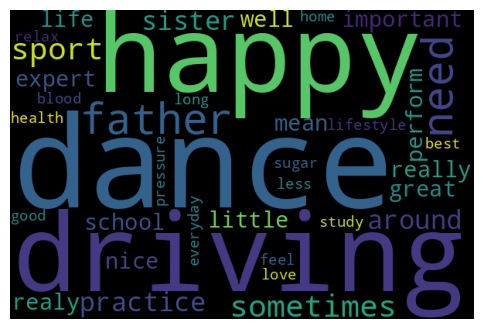

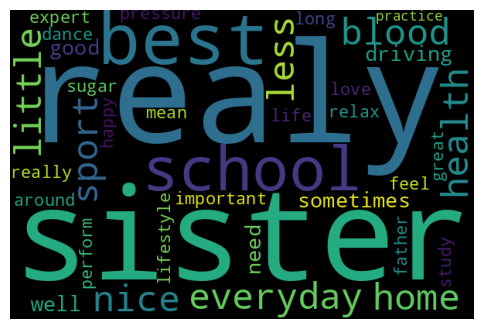

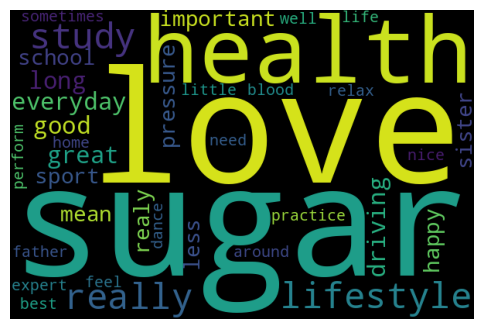

In [36]:
for i in range(3):
  draw_word_cloud(i)